In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
from collections import OrderedDict
import numpy as np

In [196]:
totalDf=pd.read_csv("lalonde.csv")
treatedDf=totalDf[totalDf["treat"]==1]
untreatedDf=totalDf[totalDf["treat"]==0]

# 1. Probensity score matching

## 1. NAIVE ANALYSIS

We only compare the income, the variable re78, from the people who got and didn't get the treatement. 

In [197]:
averageTreated=np.average(treatedDf["re78"])
averageUntreated=np.average(untreatedDf["re78"])
pd.DataFrame([averageTreated,averageUntreated],['average income treated','average income untreated'],columns=["income"])

,income
average income treated,6349.143530
average income untreated,6984.169742


You might conclude from this that the treatement is uneffective, let's take a deeper look in to the distribution of the re78 variable.

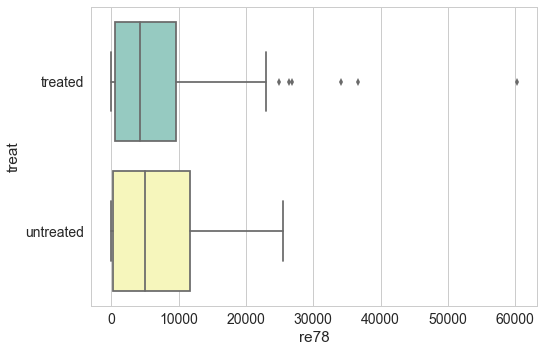

In [198]:
totalDf.treat.replace([0, 1], ["untreated", "treated"], inplace=True)
plt.close()
sns.set_style("whitegrid")
ax=sns.boxplot(x="re78",y="treat",data=totalDf,palette="Set3")
plt.show()

We can see that the treated group has some outliers but overal they earn less than the untreated group. We could have a look at the unemmployement rate in each group.

In [199]:
joblessRatioTreated=len(treatedDf[treatedDf.re78 == 0]) / len(treatedDf)
joblessRatioUntreated=len(untreatedDf[untreatedDf.re78 == 0]) / len(untreatedDf)
pd.DataFrame([joblessRatioTreated,joblessRatioUntreated],['jobless ratio treated','jobless ratio untreated'],columns=["ratio"])

,ratio
jobless ratio treated,0.243243
jobless ratio untreated,0.228438


There are 2% more jobless people in the treated group. 

We plot the distribution of the two variables.


In [200]:
def plotPercentagePay(untreatedDf,treatedDf):
    plt.close()
    bins=[[0,1],[1,500],[500,1000],[1000,1500],[2000,2500],[3000,3500],[3500,10000]]
    N=len(bins)
    binsStr=[str(bin_)+"$" for bin_ in bins]
    ratiosUntreated=[]
    ratiosTreated=[]
    for bin_ in bins:
        if unt==True:
            ratiosUntreated=len(untreatedDf[(bin_[0]<=untreatedDf.re78Unt) & (untreatedDf.re78Unt<bin_[1])]) / len(untreatedDf)*100
        else:
            ratioUntreated=len(untreatedDf[(bin_[0]<=untreatedDf.re78) & (untreatedDf.re78<bin_[1])]) / len(untreatedDf)*100
        ratioTreated=len(treatedDf[(bin_[0]<=treatedDf.re78) & (treatedDf.re78<bin_[1])]) / len(treatedDf)*100
        ratiosUntreated.append(ratioUntreated)
        ratiosTreated.append(ratioTreated)
    ind=np.arange(N)
    width=0.35

    fig, ax = plt.subplots(figsize=(12,6))

    plotTreated = ax.bar(ind, ratiosTreated, width, color='r')
    plotUntreated=ax.bar(ind+width, ratiosUntreated, width, color='y')

    ax.set_ylabel("fraction")
    ax.set_title("Percentage with pay")
    ax.set_xticks(ind+width/2)
    ax.set_xticklabels(binsStr)
    ax.legend((plotTreated[0],plotUntreated[0]),('treated','untreated'))

    plt.show()
plotPercentagePay(untreatedDf,treatedDf)

NameError: name 'unt' is not defined

TODO: make a better plot that makes more sense, tell about the more jobless people and overal lower pay in the treated group.

## 2. A CLOSER LOOK AT THE DATA

We make a plot with all the properties of the dataframe to find difference between the treated and the untreated groups.

In [201]:
def removeZerosAndOnes(df):
    dfR=df.copy()
    dfR.black=df.black.replace([0, 1],["not_black", "black"])
    dfR.hispan=df.hispan.replace([0, 1],["not_hispan", "hispan"])
    dfR.married=df.married.replace([0, 1],["not_married", "married"])
    dfR.nodegree=df.nodegree.replace([0, 1],["degree", "no_degree"])
    return dfR
def removeStrings(df):
    dfR=df.copy()
    dfR.black=df.black.replace(["not_black", "black"],[0, 1])
    dfR.hispan=df.hispan.replace(["not_hispan", "hispan"],[0, 1])
    dfR.married=df.married.replace(["not_married", "married"],[0, 1])
    dfR.nodegree=df.nodegree.replace(["degree", "no_degree"],[0, 1],)
    return dfR
untreatedDf=removeZerosAndOnes(untreatedDf)
treatedDf=removeZerosAndOnes(treatedDf)


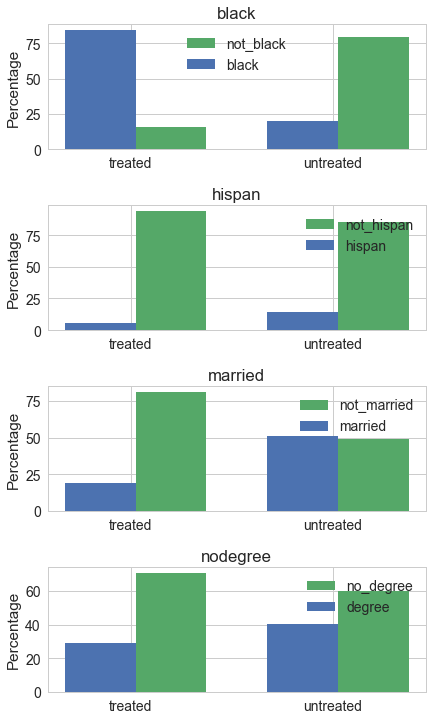

In [202]:
plt.close()
qualitativeColumns=[ 'black', 'hispan', 'married', 'nodegree']
f, axarr = plt.subplots(len(qualitativeColumns), figsize=(6,10), squeeze=False)
for i_col in range(0,len(qualitativeColumns)):
    conditions=np.unique([treatedDf[qualitativeColumns[i_col]]]);
    categories=np.unique([totalDf["treat"]])
        
    space = 0.3
    width = (1 - space) / (len(conditions))
    cUntreated=Counter(untreatedDf[qualitativeColumns[i_col]])
    totalUnTreated=sum(cUntreated.values())
    cTreated=Counter(treatedDf[qualitativeColumns[i_col]])
    totalTreated=sum(cTreated.values())
    
    for i,cond in enumerate(conditions):
        valUntreated=cUntreated[cond]/totalUnTreated * 100
        valTreated=cTreated[cond]/totalTreated * 100
        vals = [valTreated,valUntreated]
        pos = [j - (1 - space) / 2. + i * width + 0.15 for j in range(1, len(categories) + 1)]
        axarr[i_col,0].bar(pos, vals, width=width, label=cond)
        
                            
    # bar plot cosmetics
    axarr[i_col, 0].set_title(qualitativeColumns[i_col])
    axarr[i_col, 0].set_ylabel("Percentage")
    handles, labels = axarr[i_col,0].get_legend_handles_labels()
    axarr[i_col, 0].legend(handles[::-1], labels[::-1])
    indeces = range(1, len(qualitativeColumns)+1)
    axarr[i_col, 0].set_xticks([0.95, 1.95])
    axarr[i_col, 0].set_xticklabels(["treated", "untreated"])

    
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)


                           
plt.show()


We clearly see a big difference in the following categories: black (a huge difference),married, and also a little bit whether or not they have a degree. Let's take a look at the other variables. 

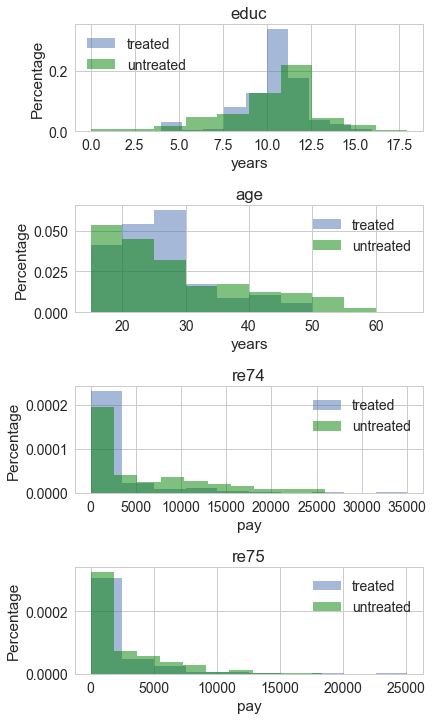

In [203]:
quantitativeColumns=['educ','age','re74','re75']
xaxis=["years","years","pay","pay"]
plt.close()
binsAge=list(np.array(range(3,14))*5)
f, axarr = plt.subplots(len(qualitativeColumns), figsize=(6,10), squeeze=False)
for i_col,columnName in enumerate(quantitativeColumns):
    bins=None
    if columnName=="age":
        bins=binsAge
        
    axarr[i_col,0].hist(treatedDf[columnName],bins=bins,alpha=0.5,normed=True)
    axarr[i_col,0].hist(untreatedDf[columnName],bins=bins,alpha=0.5,normed=True,color="green")
    axarr[i_col,0].set_title(quantitativeColumns[i_col])
    axarr[i_col,0].set_ylabel("Percentage")
    axarr[i_col,0].set_xlabel(xaxis[i_col])
    axarr[i_col,0].legend(["treated", "untreated"])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)   
plt.show()

In these variables we see that mainly the eduction is different. The naive researcher was wrong because he was comparing 2 completely diffent groups. One group less eductated mainly black people. The other group more educted mainly white people.

## 3. A PROPENSITY SCORE MODEL

In [204]:
totalDf=pd.read_csv("lalonde.csv")

In [205]:
from sklearn import linear_model
logistic = linear_model.LogisticRegression()
logistic.fit(totalDf[["black","hispan","married","nodegree","educ"]].values,totalDf["treat"].values)
logistic.coef_

array([[ 2.75103196,  0.55584363, -0.91742371,  0.24312751,  0.01772011]])

We can see that the coëfficient of the black column has a big influence. Let's calculate the propensity scores and put them in a dataframe.

In [206]:
r=logistic.predict_proba(totalDf[["black","hispan","married","nodegree","educ"]])
propensityDf=totalDf[["black","hispan","married","nodegree","educ","treat"]].copy()
print(logistic.classes_)
propensityDf["propensity_score"]=[s[1] for s in r]
propensityDf.head()


[0 1]


,black,hispan,married,nodegree,educ,treat,propensity_score
0,1,0,1,1,11,1,0.480955
1,0,1,0,1,9,1,0.199500
2,1,0,0,0,12,1,0.649263
3,1,0,0,1,11,1,0.698719
4,1,0,0,1,8,1,0.687412


Let's have a look at some propensity scores to get a feeling of what they mean. Lets select a sample where there is a degree and the person is not black and married. This should have a very low propensity score since this person does not look like at all like the group that is treated. We see below that this is indeed the case.

In [207]:
propensityDf.loc[(propensityDf['black'] == 0) & (propensityDf['nodegree']==0)& (propensityDf['married']==1)].head(1)

,black,hispan,married,nodegree,educ,treat,propensity_score
9,0,0,1,0,12,1,0.045103


Let's have a look at an opposit case,we expect a high propensity score:


In [208]:
propensityDf.loc[(propensityDf['black'] == 1) & (propensityDf['nodegree']==1) & (propensityDf['married']==0)].head(3)

,black,hispan,married,nodegree,educ,treat,propensity_score
3,1,0,0,1,11,1,0.698719
4,1,0,0,1,8,1,0.687412
5,1,0,0,1,9,1,0.691207


## 4. Balancing the dataset via matching

We use the propensity scores to match each data point from the treated group with exactly one point from the untreated group. The points must be unique.
The algorithm works as follows:
1. The propensity scores of both treated and untreated with their indexes are sorted.
2. A result dictionairy is created with the keys of the untreated group. Some of these keys will be matched with 
   the treated group according to the best matching propensity score.
3. For every propensity score in the treated group a best match is found this is done in the following steps
    a)iterate through the untreated group 
    b)look if the propensity score is in between two following propensity scores of the untreated group.
    c)Of those two following => find the closest propensity score
    d)If this closest untreated propensity score is still free => match with it.
      If it is not free => resolve the conflict. 
      Resolving the conflict is done as described in resolve conflict.
4. All the matches are found => make a dictionairy that maps the treated to the untreated
       
    



In [209]:
#SOME HELPER FUNCTIONS FOR THE ALGORITHM
def extractFreeNeighbourListLeftAndRight(resultDict1, key2):
    """
    returns a list of keys of the neighbours up untill the ones that are free.
    succesLeft and succesRight indicates that the right or left neighbours are indeed free
    (needed in case we are at the end of the list)
    """
    neighbourList = [key2]
    
    indexK = list(resultDict1.keys()).index(key2)
    items = list(resultDict1.items())
    i
    #Find left neighbour
    index = indexK
    succesLeft = False
    while index>0:
        index = index-1
        content = items[index][1] 
        neighbourList = [items[index][0]]+neighbourList
        if content =="invalid":
            #We found an empty neighbour
            succesLeft = True
            break
    #Find right neighbour
    index = indexK
    succesRight = False
    while index < len(resultDict1.items()) - 1:
        index = index + 1
        content = items[index][1]
        neighbourList.append(items[index][0])
        if content == "invalid":
            #We found a right neighbour
            succesRight = True
            break
    return neighbourList, succesLeft, succesRight
def computeLossList(list1,list2):
    """
    computes the los between two lists of propensity scores.
    """
    assert(len(list1)==len(list2))
    return sum(abs(list1[i] - list2[i]) for i in range(0, len(list1)))
def resolveConflict(resultDict1, untreatedPropDict, treatedPropDict, key2, conflictKey):
    """
    Resolves the matching conflict on key2 of the resultDict1.
    Main idea 
    1.find the neighbour list which contains the keys pointing to propensity scores of untreated people.
      These keys also point to the current match with a treated propensity score. 
      The outer keys of neighbours do not point to a treated propensity score.
    2.Make the list of the treated propensity scores that match with neighbours. 
      This list is shorter than the nieghbourList because
      the outer elements of neighbourlist do not point to a propensity score of the treated group.
    3.Find the best placement of this list on top of the neighbourlist.
    """
    #1.)
    #Find closest smallest an closest biggest unmatched propensity score
    neighbourList, succesLeft, succesRight = extractFreeNeighbourListLeftAndRight(resultDict1,key2)
    
    #Usefull values
    valueToPlaceTreated = treatedPropDict[conflictKey]
    valueUntreated = untreatedPropDict[key2]
    #2.)
    #The treated keys that are matched with the untreatedkeys in the neighbourlist.
    matchedWithNeighbours = [resultDict1[key] for key in neighbourList if resultDict1[key] != "invalid"]
    propensityScoresOfNeighbours = [untreatedPropDict[key] for key in neighbourList]
    propensityScoresOfMatchedWithNeighbours = [treatedPropDict[key] for key in matchedWithNeighbours]
    
    #Value to place treated is always gonna be bigger than the current values => we must append
    propensityScoresOfMatchedWithNeighbours.append(valueToPlaceTreated)
    matchedWithNeighbours.append(conflictKey)
    #3.)
    #The neighbourlist has both a right and left empty spot
    if succesLeft and succesRight:
        #Try the left slice of the untreated propensity scores
        lossLeft = computeLossList(propensityScoresOfMatchedWithNeighbours, propensityScoresOfNeighbours[:-1])
        #Try the right slice of the untreated propensity scores
        lossRight = computeLossList(propensityScoresOfMatchedWithNeighbours, propensityScoresOfNeighbours[1:])
        #Determine the best solution and update the result dict
        if lossLeft <= lossRight:
            #Left won, update the resultDictionairies
            assert(len(neighbourList[:-1]) == len(matchedWithNeighbours))
            minidict1 = dict(zip(neighbourList[:-1], matchedWithNeighbours))
            resultDict1.update(minidict1)
            
        else:
            
            #Right won, update the dictionairies.
            assert(len(neighbourList[1:]) == len(matchedWithNeighbours))
            minidict1 = dict(zip(neighbourList[1:], matchedWithNeighbours))
            resultDict1.update(minidict1)
    elif succesLeft:
        #Shift to the left 
        #(not really shifting becuase the matchedWithNeighbours list does not contain a free elemnt on the right)
        assert(succesRight == False)
        assert(len(neighbourList) == len(matchedWithNeighbours))
        minidict1 = dict(zip(neighbourList, matchedWithNeighbours))
        resultDict1.update(minidict1)
    elif succesRight:
        #Shift to the right.
        minidict1=dict(zip(neighbourList,matchedWithNeighbours))
        resultDict1.update(minidict1)
    else:
        print("ERROR list is totally full")
        
    return resultDict1

In [210]:
#Just make sure that we can find a match for every treated propensity score
#Because the propensity scores are sorted we can be more efficiently when iterating
def findMatching(treatedPropDf,untreatedPropDf):
    """
    Finds the optimal matching between two dictionairies with propensity scores.
    """
    last_index=0


    #1.The propensitie scores are sorted.
    treatedPropDict=OrderedDict(treatedPropDf.sort_values("propensity_score")["propensity_score"])
    untreatedPropDict=OrderedDict(untreatedPropDf.sort_values("propensity_score")["propensity_score"])
    assert(len(untreatedPropDict)>len(treatedPropDict))
    untreatedValues=list(untreatedPropDict.values())   


    #2.Creation of result dictionairy
    resultDict1=dict(zip(list(untreatedPropDict.keys()),["invalid" for k in range(len(untreatedPropDict.keys()))]))

    #3. for every propensity score in the treated group the betch match is found
    for key,value in treatedPropDict.items():
        #a)iterate through the untreated group
        for i in range(last_index,len(untreatedValues)-1):
            #b)check if value is in between
            if untreatedValues[i]<=value<=untreatedValues[i+1]:
                #Value is inbetween
                #c)Find closest match
                if np.abs(untreatedValues[i]-value)<=np.abs(untreatedValues[i+1]-value):
                    #Closest match is found
                    key2=list(untreatedPropDict.items())[i][0]
                    closestMatch=untreatedValues[i]
                    chosenIndex=i                           
                else:
                    key2=list(untreatedPropDict.items())[i+1][0]
                    closestMatch=untreatedValues[i+1]
                    chosenIndex=i+1

                #d)Try to place the value
                if resultDict1[key2]!="invalid":
                    #CONFLICT, the propensity score was already matched
                    resultDict1=resolveConflict(resultDict1,untreatedPropDict,treatedPropDict,key2,key)
                else:
                    #NO conflict, untreatedPropensity score was not yet matched
                    resultDict1[key2]=key
                break
            #Some extra checks that we do not fall out of the range of the untreated propensity scores
            if value>untreatedValues[-1]:
                #value is bigger than biggest untreated => match with biggest untreated
                lastKey=list(untreatedPropDict.items())[-1][0]
                if resultDict1[lastkey]!="invalid":
                    resultDict1=resolveConflict(resultDict1,untreatedPropDict,treatedPropDict,lastkey,key)
                else:
                    resultDict1[lastkey]=key
                break
            if value<untreatedValues[0]:
                #value is smaller than smallest untreated => match with smallest untreated
                firstkey=list(untreatedPropDict.items())[0][0]
                if resultDict1[firstkey]!="invalid":
                    resultDict1=resolveConflict(resultDict1,untreatedPropDict,treatedPropDict,firstkey,key)
                else:
                    resultDict1[firstkey]=key
                break
        #Since both list are sorted we do not have to look from all the way from the beginning of the untreated values.
        last_index=i
    #4.) Make the final matching dictionairy
    finalMatchedWithTreated={value:key for key,value in resultDict1.items() if value!='invalid'}
    return finalMatchedWithTreated
treatedPropDf=propensityDf[propensityDf["treat"]==1]
untreatedPropDf=propensityDf[propensityDf["treat"]==0]
finalMatchedWithTreated=findMatching(treatedPropDf,untreatedPropDf);

Now we can finally compare the two lists treated versus untreated distributino of re78. Let's make a dataframe that contains the pairs. For later use we include all the features.

In [211]:
compareDf=treatedDf.copy()
columnNamesUntreated=list(untreatedDf.columns)
columnNamesUntreated.remove("id")
columnNamesUntreatedRenamed=[string+"Unt" for string in columnNamesUntreated]
compareDf=pd.concat([compareDf,pd.DataFrame(columns=columnNamesUntreatedRenamed)])
compareDf.head()
for treatedKey,untreatedKey in finalMatchedWithTreated.items():
    compareDf.loc[treatedKey,columnNamesUntreatedRenamed]=list(untreatedDf.loc[untreatedKey,columnNamesUntreated])
compareDf.head()

,age,ageUnt,black,blackUnt,educ,educUnt,hispan,hispanUnt,id,married,...,nodegree,nodegreeUnt,re74,re74Unt,re75,re75Unt,re78,re78Unt,treat,treatUnt
0,37.0,16,black,not_black,11.0,10,not_hispan,not_hispan,NSW1,married,...,no_degree,no_degree,0.0,574.065,0.0,1181.61,9930.0460,5578.42,1.0,0
1,22.0,16,not_black,not_black,9.0,9,hispan,not_hispan,NSW2,not_married,...,no_degree,no_degree,0.0,0,0.0,0,3595.8940,6494.61,1.0,0
2,30.0,18,black,not_black,12.0,8,not_hispan,hispan,NSW3,not_married,...,degree,no_degree,0.0,0,0.0,902.323,24909.4500,1306.31,1.0,0
3,27.0,17,black,black,11.0,9,not_hispan,not_hispan,NSW4,not_married,...,no_degree,no_degree,0.0,0,0.0,981.097,7506.1460,8900.35,1.0,0
4,33.0,50,black,black,8.0,5,not_hispan,not_hispan,NSW5,not_married,...,no_degree,no_degree,0.0,411.446,0.0,0,289.7899,9166.34,1.0,0


Let's analyze this data.

In [212]:
averageTreated=np.average(compareDf["re78"])
averageUntreatedMatched=np.average(compareDf["re78Unt"])
difference=averageTreated-averageUntreatedMatched
pd.DataFrame([averageTreated,averageUntreatedMatched,difference],['average income treated','average income untreated matched','treated-untreated'],columns=["income"])

,income
average income treated,6349.143530
average income untreated matched,5588.737915
treated-untreated,760.405615


This already makes the treatement look way more effective than before, a treated person earns 760 more than an untreated! Let's look at the distribution of the variables.

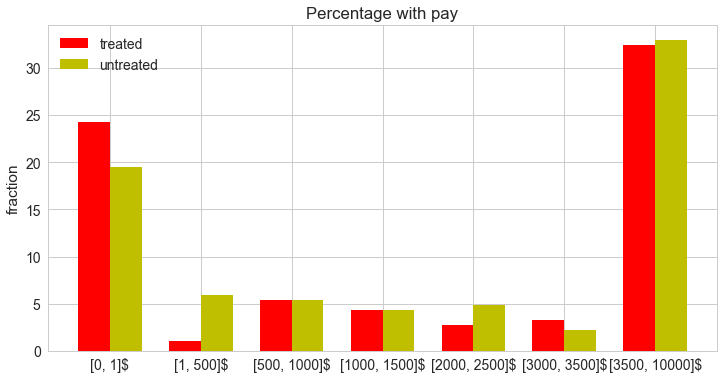

In [213]:
plt.close()
bins=[[0,1],[1,500],[500,1000],[1000,1500],[2000,2500],[3000,3500],[3500,10000]]
N=len(bins)
binsStr=[str(bin_)+"$" for bin_ in bins]
ratiosUntreated=[]
ratiosTreated=[]
for bin_ in bins:
    ratioUntreated=len(compareDf[(bin_[0]<=compareDf.re78Unt) & (compareDf.re78Unt<bin_[1])]) / len(compareDf)*100
    ratioTreated=len(compareDf[(bin_[0]<=compareDf.re78) & (compareDf.re78<bin_[1])]) / len(compareDf)*100
    ratiosUntreated.append(ratioUntreated)
    ratiosTreated.append(ratioTreated)
ind=np.arange(N)
width=0.35

fig, ax = plt.subplots(figsize=(12,6))

plotTreated = ax.bar(ind, ratiosTreated, width, color='r')
plotUntreated=ax.bar(ind+width, ratiosUntreated, width, color='y')

ax.set_ylabel("fraction")
ax.set_title("Percentage with pay")
ax.set_xticks(ind+width/2)
ax.set_xticklabels(binsStr)
ax.legend((plotTreated[0],plotUntreated[0]),('treated','untreated'))

plt.show()

We can indeed see that the treated group does better than the untreated group.

Let's look at the feature value distributions as in question 2.

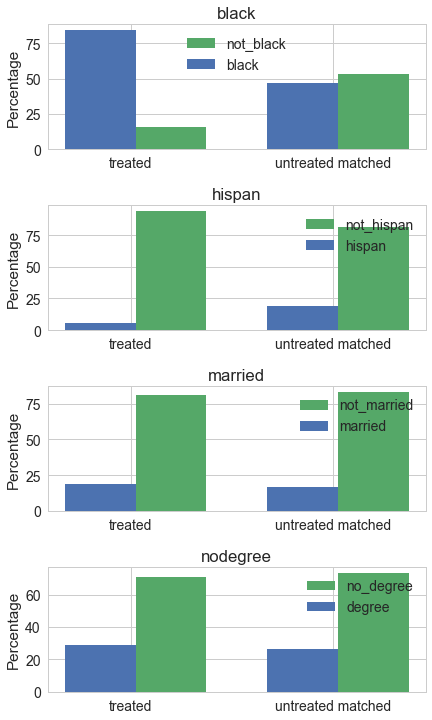

In [214]:
plt.close()
qualitativeColumnsTreated = [ 'black', 'hispan', 'married', 'nodegree']
qualitativeColumnsUntreated = [ 'blackUnt', 'hispanUnt', 'marriedUnt', 'nodegreeUnt']
f, axarr = plt.subplots(len(qualitativeColumns), figsize=(6,10), squeeze=False)
for i_col in range(0,len(qualitativeColumns)):
    conditions=np.unique([treatedDf[qualitativeColumns[i_col]]]);
    categories=["treated","untreated"]  
    space = 0.3
    width = (1 - space) / (len(conditions))
    cUntreated=Counter(compareDf[qualitativeColumnsUntreated[i_col]])
    totalUnTreated=sum(cUntreated.values())
    cTreated=Counter(compareDf[qualitativeColumnsTreated[i_col]])
    totalTreated=sum(cTreated.values())
    
    for i,cond in enumerate(conditions):
        valUntreated=cUntreated[cond]/totalUnTreated*100
        valTreated=cTreated[cond]/totalTreated*100
        vals = [valTreated,valUntreated]
        pos = [j - (1 - space) / 2. + i * width +0.15 for j in range(1,len(categories)+1)]
        axarr[i_col,0].bar(pos, vals, width=width, label=cond)
                              
    # bar plot cosmetics
    axarr[i_col,0].set_title(qualitativeColumns[i_col])
    axarr[i_col,0].set_ylabel("Percentage")
    handles, labels = axarr[i_col,0].get_legend_handles_labels()
    axarr[i_col,0].legend(handles[::-1], labels[::-1])
    indeces = range(1, len(qualitativeColumns)+1)
    axarr[i_col,0].set_xticks([0.95,1.95])
    axarr[i_col,0].set_xticklabels(["treated","untreated matched"])

    
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)


                           
plt.show()



We can clearly see that the fraction black people in the the treated group is still way (80% vs <50%) bigger than the untreated match ratio. This is a problematic feature.

Let's also look at the other variables to look if there are more problematic features

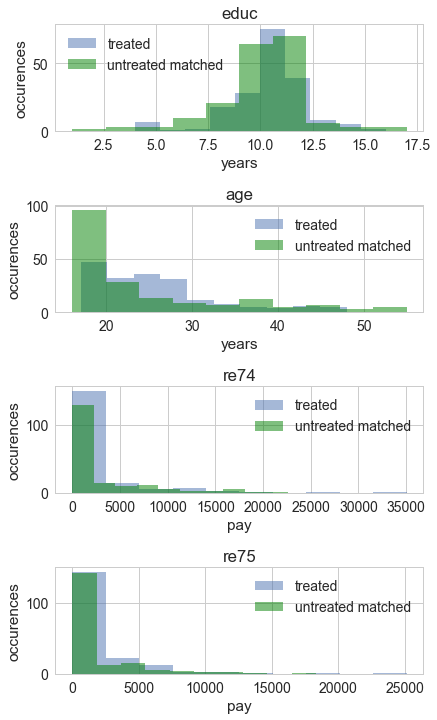

In [215]:
quantitativeColumnsTreated=['educ','age','re74','re75']
quantitativeColumnsUntreated=['educUnt','ageUnt','re74Unt','re75Unt']
xaxis=["years","years","pay","pay"]


f, axarr = plt.subplots(len(qualitativeColumns), figsize=(6,10), squeeze=False)
for i_col,columnName in enumerate(quantitativeColumns):
    axarr[i_col,0].hist(compareDf[columnName],alpha=0.5)
    axarr[i_col,0].hist(compareDf[quantitativeColumnsUntreated[i_col]],alpha=0.5,color="green")
    axarr[i_col,0].set_title(quantitativeColumns[i_col])
    axarr[i_col,0].set_ylabel("occurences")
    axarr[i_col,0].set_xlabel(xaxis[i_col])
    axarr[i_col,0].legend(["treated", "untreated matched"])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)   
plt.show()

There is also an imbalance in age but not as bad as in race.

## 5. Balancing the groups further

As seen before the imbalance is mainly in the black percentage. We will try to balance the groups further by only matching black with black and white with white.

Let's look at our current matched dataframe and see how many black people are not matched with another black person.

In [216]:
blackNotMatchedToBlack=compareDf.loc[(compareDf['black'] == "black") & (compareDf['blackUnt']=="not_black")].copy()
notBlackMatchedToBlack=compareDf.loc[(compareDf['black'] == "no_black") & (compareDf['blackUnt']=="black")].copy()

In [217]:
print("black treated people matched with not black: "+str(len(blackNotMatchedToBlack)))
print("not black matched with black: "+str(len(notBlackMatchedToBlack)))

black treated people matched with not black: 69
not black matched with black: 0


We see that every black person of the untreated group is matched with a black person from the treated group. We try to match the black people that match with not black people to other black people of the untreated group. Hence an untreated sample can have more than one match. We do this again by doing a propensity analysis but only with the black people from the treated group. We use the found weights to match with the best black option from the untreated group. Note that now a untreated person can have more than two matches: one from earlier and one from now. 

In [218]:
untreatedDf.head()

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
185,PSID1,0,30,12,not_black,not_hispan,married,degree,20166.73,18347.23,25564.67
186,PSID2,0,26,12,not_black,not_hispan,married,degree,25862.32,17806.55,25564.67
187,PSID3,0,25,16,not_black,not_hispan,married,degree,25862.32,15316.21,25564.67
188,PSID4,0,42,11,not_black,not_hispan,married,no_degree,21787.05,14265.29,15491.01
189,PSID5,0,25,9,black,not_hispan,married,no_degree,14829.69,13776.53,0.00


In [219]:
blackNotMatchedToBlack=removeStrings(blackNotMatchedToBlack)
untreatedDf=removeStrings(untreatedDf)

In [220]:
blackPeopleOveral=totalDf[totalDf["black"]==1].copy()
#Drop black column
blackPeopleOveral.drop("black",1,inplace=True)
#Do regression
logistic = linear_model.LogisticRegression()
logistic.fit(blackPeopleOveral[["age","hispan","married","nodegree","educ"]].values,blackPeopleOveral["treat"].values)

#We only want to match the ones that were not matched to a black person yet
r=logistic.predict_proba(blackNotMatchedToBlack[["age","hispan","married","nodegree","educ"]])
treatedPropDf=blackNotMatchedToBlack[["age","hispan","married","nodegree","educ","treat"]].copy()
treatedPropDf["propensity_score"]=[s[1] for s in r]
#We take all the black persons of the untreated 
blackUntreated=untreatedDf.loc[untreatedDf['black']==1]
r=logistic.predict_proba(blackUntreated[["age","hispan","married","nodegree","educ"]])
untreatedPropDf=blackUntreated[["age","hispan","married","nodegree","educ","treat"]].copy()
untreatedPropDf["propensity_score"]=[s[1] for s in r]


#Match the propensity scores of treated and untreated values.
extraMatches=findMatching(treatedPropDf,untreatedPropDf)
#update the current result dict
resultDict=finalMatchedWithTreated.copy()
resultDict.update(extraMatches)
#Make the dataframe again.
untreatedDf=removeZerosAndOnes(untreatedDf)
compareDf=treatedDf.copy()
columnNamesUntreated=list(untreatedDf.columns)
columnNamesUntreated.remove("id")
columnNamesUntreatedRenamed=[string+"Unt" for string in columnNamesUntreated]
compareDf=pd.concat([compareDf,pd.DataFrame(columns=columnNamesUntreatedRenamed)])
for treatedKey,untreatedKey in resultDict.items():
    compareDf.loc[treatedKey,columnNamesUntreatedRenamed]=list(untreatedDf.loc[untreatedKey,columnNamesUntreated])
compareDf.head()

,age,ageUnt,black,blackUnt,educ,educUnt,hispan,hispanUnt,id,married,...,nodegree,nodegreeUnt,re74,re74Unt,re75,re75Unt,re78,re78Unt,treat,treatUnt
0,37.0,16,black,black,11.0,9,not_hispan,not_hispan,NSW1,married,...,no_degree,no_degree,0.0,0,0.0,277.5,9930.0460,3983.95,1.0,0
1,22.0,16,not_black,not_black,9.0,9,hispan,not_hispan,NSW2,not_married,...,no_degree,no_degree,0.0,0,0.0,0,3595.8940,6494.61,1.0,0
2,30.0,18,black,black,12.0,9,not_hispan,not_hispan,NSW3,not_married,...,degree,no_degree,0.0,1183.4,0.0,1822.55,24909.4500,803.883,1.0,0
3,27.0,17,black,black,11.0,9,not_hispan,not_hispan,NSW4,not_married,...,no_degree,no_degree,0.0,0,0.0,981.097,7506.1460,8900.35,1.0,0
4,33.0,50,black,black,8.0,5,not_hispan,not_hispan,NSW5,not_married,...,no_degree,no_degree,0.0,411.446,0.0,0,289.7899,9166.34,1.0,0


Let's now look at the plots again

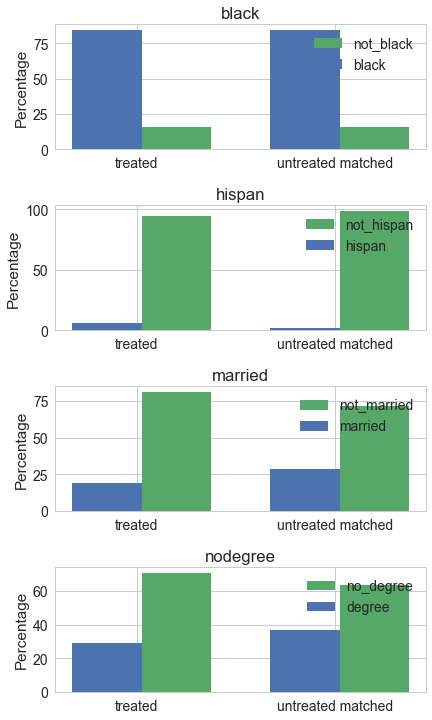

In [221]:
plt.close()
qualitativeColumnsTreated=[ 'black', 'hispan', 'married', 'nodegree']
qualitativeColumnsUntreated=[ 'blackUnt', 'hispanUnt', 'marriedUnt', 'nodegreeUnt']
f, axarr = plt.subplots(len(qualitativeColumns), figsize=(6,10), squeeze=False)
for i_col in range(0,len(qualitativeColumns)):
    conditions=np.unique([treatedDf[qualitativeColumns[i_col]]]);
    categories=["treated","untreated"]
        
    space = 0.3
    width = (1 - space) / (len(conditions))
    cUntreated=Counter(compareDf[qualitativeColumnsUntreated[i_col]])
    totalUnTreated=sum(cUntreated.values())
    cTreated=Counter(compareDf[qualitativeColumnsTreated[i_col]])
    totalTreated=sum(cTreated.values())
    
    for i,cond in enumerate(conditions):
        valUntreated=cUntreated[cond]/totalUnTreated*100
        valTreated=cTreated[cond]/totalTreated*100
        vals = [valTreated,valUntreated]
        pos = [j - (1 - space) / 2. + i * width +0.15 for j in range(1,len(categories)+1)]
        axarr[i_col,0].bar(pos, vals, width=width, label=cond)
        
                            
    # bar plot cosmetics
    axarr[i_col,0].set_title(qualitativeColumns[i_col])
    axarr[i_col,0].set_ylabel("Percentage")
    handles, labels = axarr[i_col,0].get_legend_handles_labels()
    axarr[i_col,0].legend(handles[::-1], labels[::-1])
    indeces = range(1, len(qualitativeColumns)+1)
    #axarr[i_col,0].set_xticks(indeces)
    axarr[i_col,0].set_xticks([0.95,1.95])
    axarr[i_col,0].set_xticklabels(["treated","untreated matched"])
    

    
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)


                           
plt.show()




The matching of the properties looks more even than before. Indeed the ratio black/notblack is now equal. We plot the other properties.

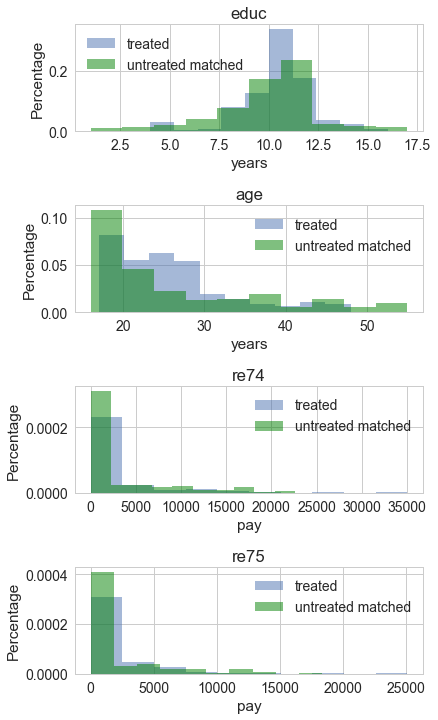

In [222]:
quantitativeColumnsTreated=['educ','age','re74','re75']
quantitativeColumnsUntreated=['educUnt','ageUnt','re74Unt','re75Unt']
xaxis=["years","years","pay","pay"]


f, axarr = plt.subplots(len(qualitativeColumns), figsize=(6,10), squeeze=False)
for i_col,columnName in enumerate(quantitativeColumns):
    axarr[i_col,0].hist(compareDf[columnName],alpha=0.5,normed=True)
    axarr[i_col,0].hist(compareDf[quantitativeColumnsUntreated[i_col]],alpha=0.5,color="green",normed=True)
    axarr[i_col,0].set_title(quantitativeColumns[i_col])
    axarr[i_col,0].set_ylabel("Percentage")
    axarr[i_col,0].set_xlabel(xaxis[i_col])
    
    axarr[i_col,0].legend(["treated", "untreated matched"])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)   
plt.show()

## 6. A less naive analysis


Let's look at our final results. 

In [223]:
averageTreated=np.average(compareDf["re78"])
averageUntreatedMatched=np.average(compareDf["re78Unt"])
difference=averageTreated-averageUntreatedMatched
pd.DataFrame([averageTreated,averageUntreatedMatched,difference],['average income treated','average income untreated matched','treated-untreated'],columns=["income"])

,income
average income treated,6349.143530
average income untreated matched,4891.450569
treated-untreated,1457.692961


Wow what a difference! The program makes makes the treated people earn way more, the program looks effective.
Let's have a look at the distribution.

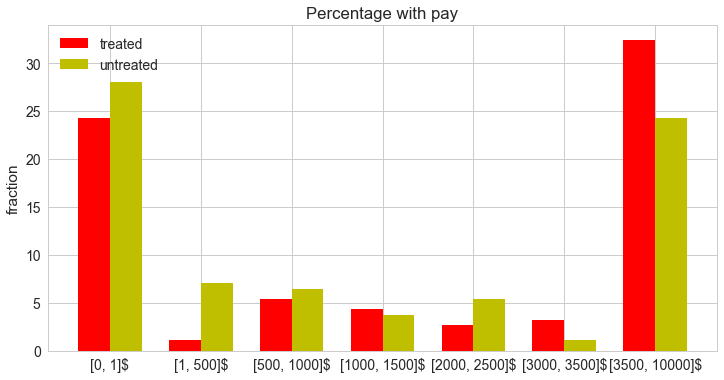

In [224]:
plt.close()
bins=[[0,1],[1,500],[500,1000],[1000,1500],[2000,2500],[3000,3500],[3500,10000]]
N=len(bins)
binsStr=[str(bin_)+"$" for bin_ in bins]
ratiosUntreated=[]
ratiosTreated=[]
for bin_ in bins:
    ratioUntreated=len(compareDf[(bin_[0]<=compareDf.re78Unt) & (compareDf.re78Unt<bin_[1])]) / len(compareDf)*100
    ratioTreated=len(compareDf[(bin_[0]<=compareDf.re78) & (compareDf.re78<bin_[1])]) / len(compareDf)*100
    ratiosUntreated.append(ratioUntreated)
    ratiosTreated.append(ratioTreated)
ind=np.arange(N)
width=0.35

fig, ax = plt.subplots(figsize=(12,6))

plotTreated = ax.bar(ind, ratiosTreated, width, color='r')
plotUntreated=ax.bar(ind+width, ratiosUntreated, width, color='y')

ax.set_ylabel("fraction")
ax.set_title("Percentage with pay")
ax.set_xticks(ind+width/2)
ax.set_xticklabels(binsStr)
ax.legend((plotTreated[0],plotUntreated[0]),('treated','untreated'))

plt.show()

The program is indeed effective!

# 2.

<h2>2.1</h2>

 Load the 20newsgroup dataset. It is, again, a classic dataset that can directly be loaded using sklearn (link).
TF-IDF, short for term frequency–inverse document frequency, is of great help when if comes to compute textual features. Indeed, it gives more importance to terms that are more specific to the considered articles (TF) but reduces the importance of terms that are very frequent in the entire corpus (IDF). Compute TF-IDF features for every article using TfidfVectorizer. Then, split your dataset into a training, a testing and a validation set (10% for validation and 10% for testing). Each observation should be paired with its corresponding label (the article category).

Steps:

 **1)** First the 20 newsgroup dataset was loaded from scikit learn library and dataset was explored
 
 **2)** TF-IDF Vectorizer was implemented on text data 
 
 **3)** Data is split in Training, validation and testing set and displayed the distribution of documents in each category for each split using dataframe and horizontal bar chart

In [31]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator
import collections
import warnings

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.corpus import names
from nltk.stem import WordNetLemmatizer

import pandas as pd
from sklearn.datasets import fetch_20newsgroups #loader function for the 20 newsgroups
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
warnings.filterwarnings('ignore')

%matplotlib inline


Then we can download the dataset with the default parameters:

In [32]:
groups = fetch_20newsgroups()

After we download the 20 newsgroups by whatever means we prefer, the data object called groups is now available in the program. The data object is in the form of key-value dictionary. Its keys are as follows:

In [33]:
groups.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR', 'description'])

The target key corresponds to a newsgroup but is encoded as an integer:

In [34]:
groups.target

array([7, 4, 4, ..., 3, 1, 8])

Then what are the distinct values for these integers? We can use the unique function from NumPy to figure it out:



In [35]:
np.unique(groups.target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

They range from 0 to 19, representing 20 topics. Let’s now have a look at the document name:



In [36]:
 print (groups.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']



It's good to visualize to get a general idea of  the distribution of topics, what possible issues may arise, and if there are any irregularities that we have to take care of.



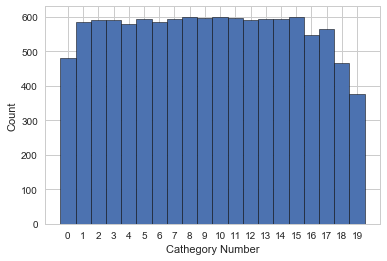

In [37]:
aplot = plt.hist(groups.target, bins=range(21),align = 'left',edgecolor='black', linewidth=0.5)
plt.xlabel('Cathegory Number')
plt.ylabel('Count')
plt.xticks(np.arange(min(groups.target), max(groups.target)+1, 1.0))
plt.show()


As we can see the distribution is approximately uniform, so that is one less thing to worry about.

In [38]:
cv = CountVectorizer(stop_words="english", max_features=500)  
transformed = cv.fit_transform(groups.data)

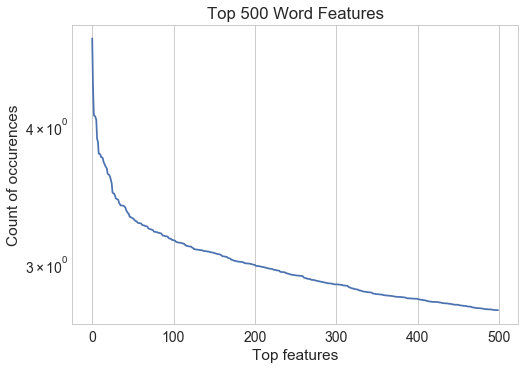

In [225]:
counts=transformed.toarray().sum(axis=0)
counts=sorted(counts,reverse=True)
plt.plot(range(500),np.log10(counts))
plt.yscale('log')
plt.xlabel('Top features')
plt.ylabel('Count of occurences' )
plt.title('Top 500 Word Features')
plt.show()

In [40]:
dataset= fetch_20newsgroups(shuffle=True, remove=('headers','footers','quotes'),random_state=6)

print ('Posts inside the data: %s' %len(dataset.data))
print('Average number of words for post: %0.0f'%np.mean([len(text.split(' ')) for text in dataset.data]))

Posts inside the data: 11314
Average number of words for post: 206


In [41]:
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')


Lets Convert dataset to vectors using the TfidfVectorizer.



In [42]:
vectorizer = TfidfVectorizer(ngram_range=(1,3))
vectors=vectorizer.fit_transform(groups.data)

Split the data in 10% testing and 90% training set first, then split the training set again with 10% validation set.

In [43]:
X_train, X_test,X_train_data,X_test_data, y_train, y_test = train_test_split(vectors,groups.data, groups.target, test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)
total_doc_by_category=collections.Counter(groups.target)
training_doc_by_category=collections.Counter(y_train)
validation_doc_by_category=collections.Counter(y_val)
test_doc_by_category=collections.Counter(y_test)

df = pd.DataFrame([training_doc_by_category,validation_doc_by_category, test_doc_by_category,total_doc_by_category]).T
df.columns = ['Training docs', 'Validation docs','Testing docs','Total docs']

df.insert(loc=0, column='Docs Category', value=pd.Series(groups['target_names']))
df=df.groupby('Docs Category').sum()
df.head()

,Training docs,Validation docs,Testing docs,Total docs
Docs Category,,,,
alt.atheism,382,44,54,480
comp.graphics,484,43,57,584
comp.os.ms-windows.misc,473,59,59,591
comp.sys.ibm.pc.hardware,477,43,70,590
comp.sys.mac.hardware,465,52,61,578


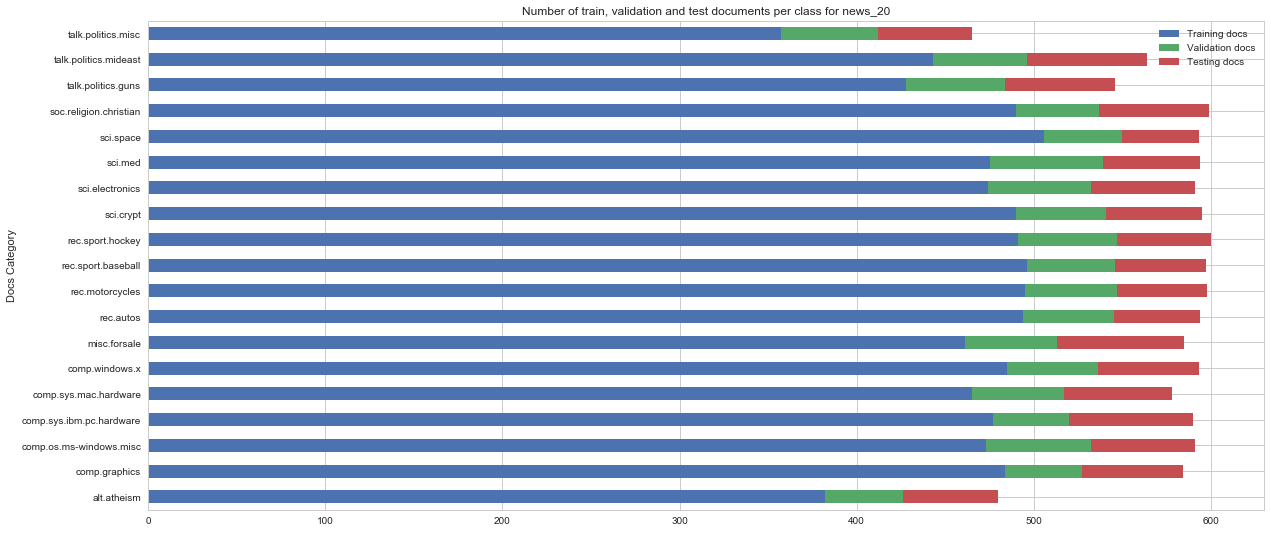

In [44]:
df.iloc[:-1,:-1].plot.barh(stacked=True, 
                                    figsize=(20,9),
                                    title="Number of train, validation and test documents per class for news_20")

<h2>2.2</h2>

Train a random forest on your training set. Try to fine-tune the parameters of your predictor on your validation set using a simple grid search on the number of estimator "n_estimators" and the max depth of the trees "max_depth". Then, display a confusion matrix of your classification pipeline. Lastly, once you assessed your model, inspect the feature_importances_ attribute of your random forest and discuss the obtained results.

Steps

**1)** Random forest model was trained, applied on testing set, accuracy  measured and confusion matrix displayed

**2)** Random forest model parameters were tuned, applied on testing on testing set, accuracy  measured and confusion matrix displayed

**3)** Feature impotance attributes were identified and obtained result discussed


Training random forest model on training set and applying on testing set without tuning parameter 

In [45]:
clf = RandomForestClassifier()
clf.fit( X_train,y_train)
predicted = clf.predict(X_test)
expected = y_test
print('training complete')

training complete


In [46]:
def name_targets(target_names, targets):
    return [target_names[t] for t in targets]

In [47]:
#Displaying dataframe of comparison between predicted and expected result 
df = pd.DataFrame({
    'expected': name_targets(y_test, expected),
    'predicted': name_targets(y_test, predicted),
    # shorten the texts to 1000 chars to reduce the volume of data to be sent to Facets Dive
    'data':  [text[:1000] + '...' for text in  X_test_data],
    # add text lengths
    'length': [len(text) for text in X_test_data],
}, columns=['expected', 'predicted', 'length', 'data'])

df.sample(10)

,expected,predicted,length,data
568,10,10,2542,From: mmchugh@andy.bgsu.edu (michael mchugh)\n...
1109,15,15,3449,From: rjb@akgua.att.com\nSubject: Re: When are...
1016,16,16,1938,From: johnh@macadam.mpce.mq.edu.au (John Haddy...
688,9,9,4340,From: Clinton-HQ@Campaign92.Org (Clinton/Gore ...
534,16,16,939,From: klinger@ccu.umanitoba.ca (Jorg Klinger)\...
447,5,19,276,From: luriem@alleg.edu(Michael Lurie) The Libe...
229,5,5,487,From: luriem@alleg.edu(Michael Lurie) The Libe...
575,16,15,883,"From: wcaw@juliet.caltech.edu (Wilisch, Wolf C..."
407,13,15,1059,From: jcherney@envy.reed.edu (Joel Alexander C...
61,14,14,693,From: pyron@skndiv.dseg.ti.com (Dillon Pyron)\...


In [48]:
#Accuray of the classification on testing set without tuning parameters
np.mean(expected== predicted)


0.6475265017667845

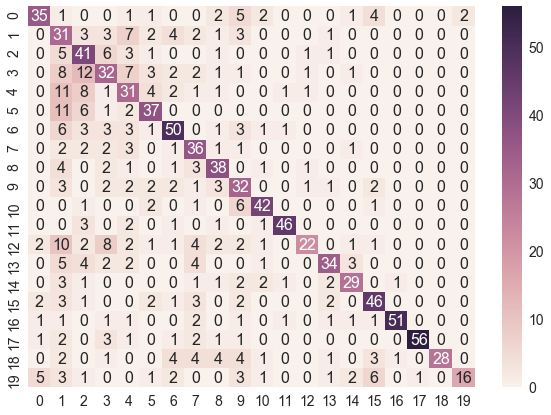

In [49]:
#Confusion matrix of classification without tuning parameters
conf_arr=metrics.confusion_matrix(y_test, predicted)

df_cm = pd.DataFrame(conf_arr, range(20),
                  range(20))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

The Matrix above shows the count correct matches for each pairing on the diagonal and the count of incorrect matches for each pairing.

But the accuracy score is very poor. Hence, tuning parameter is essential 

In [50]:
#Initializing and tuning parameters, refitting on training set and applying on testing set

tuned_parameters = [{"n_estimators" : [50,100,200], 
      "criterion" : ["gini", "entropy"],
      "max_depth":[100,200],
      "max_features":[1000,2000],
      "random_state" : [20,25]}]

print("# Tuning hyper-parameters ")
print()

clf_val = GridSearchCV(RandomForestClassifier(), tuned_parameters,n_jobs=-1)
clf_val.fit(X_val, y_val)

print("Best parameters set found on validation set:")
print()
print(clf_val.best_estimator_)
print()
print()
print()
print("Refitting the parameters on training set")
print()
clf.set_params(**clf_val.best_params_)

clf.fit( X_train,y_train)
print('Testing the model')
predicted_val = clf.predict(X_test)




# Tuning hyper-parameters 

Best parameters set found on validation set:

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features=2000, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=25,
            verbose=0, warm_start=False)



Refitting the parameters on training set

Testing the model


In [52]:
#Accuracy of the model on testing set after tuning parameter
# predicted_val= y_pred_val
expected_val= y_test
np.mean(expected_val== predicted_val)


0.86660777385159016

Much better!

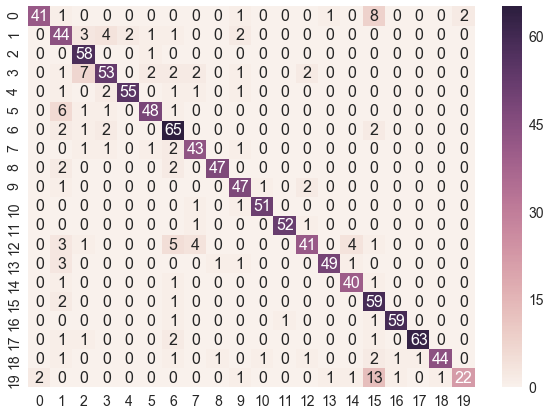

In [53]:
#Confusin marix of classification after parameters tuned
conf_arr=metrics.confusion_matrix(y_test, predicted_val)

df_cm = pd.DataFrame(conf_arr, range(20),
                  range(20))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

In [114]:
# Examine the feature importances
feature_importances = pd.Series(data=clf.feature_importances_)
feature_importances = feature_importances.sort_values(axis=0, ascending=False)

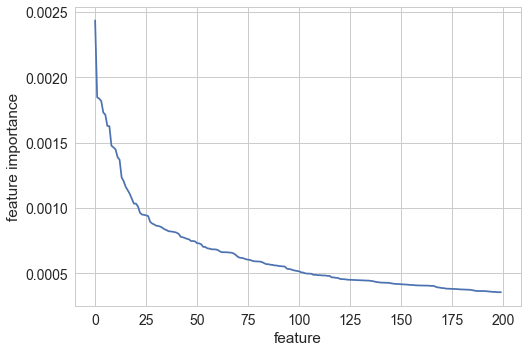

In [226]:
plt.plot(list(feature_importances.head(200).values))
plt.xlabel("feature")
plt.ylabel("feature importance")

Certain words extremely informative compared to the others we take show the thirty most important features in an extremely efficient way.

In [142]:
counterDict=[]
for key,value in feature_importances.head(50).items():
    word=vocabulary[key]
    counts=int(np.floor(value*10000000000))
    counterDict.append((word,counts))

In [133]:
vocabulary={value:key for key,value in vectorizer.vocabulary_.items()}

In [134]:
mostImportant=[vocabulary[key] for key in list(feature_importances.head(50).keys())]

In [129]:
from collections import Counter
from nltk.corpus import brown
from pytagcloud import create_tag_image, make_tags
from PIL import Image

In [139]:
# Developed from https://pypi.python.org/pypi/pytagcloud
create_tag_image(make_tags(counterDict), 'cloud.png', size=(900, 600), fontname='Nobile')

<img src="cloud.png",width=900,height=600>

Sorry but we had to do this :-) 